In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

In [25]:
df = pd.read_csv('final_data_10s.csv')

In [32]:
df['total_volume_X'] = df['X_BID_VOL'] + df['X_ASK_VOL']
df['total_volume_Y'] = df['Y_BID_VOL'] + df['Y_ASK_VOL']

In [33]:
# assume df is already loaded
n = 5
df = df.reset_index(drop=True)               # ensure RangeIndex 0..N-1
df['group'] = np.arange(len(df)) // n

# Example: mean of numeric columns per 5-row block
grouped_mean = df.groupby('group').mean().reset_index(drop=True)

grouped_mean.head(5)

/var/folders/vh/_1sssm_j4md83mcvz3jt1bhjf18777/T/ipykernel_25494/402791768.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_mean = df.groupby('group').mean().reset_index(drop=True)


,X_BID,X_BID_VOL,X_ASK,X_ASK_VOL,Y_BID,Y_BID_VOL,Y_ASK,Y_ASK_VOL,total_volume_X,total_volume_Y
0,106330.4,10.4,106336.8,7.4,105188.0,17.0,105200.0,15.2,17.8,32.2
1,106423.2,8.6,106428.0,4.2,105240.0,20.2,105256.0,17.2,12.8,37.4
2,106433.6,5.0,106438.4,4.2,105238.0,11.8,105250.0,15.6,9.2,27.4
3,106443.2,3.0,106448.0,4.8,105252.0,12.0,105264.0,12.4,7.8,24.4
4,106448.8,4.6,106453.6,3.8,105252.0,9.4,105262.0,14.6,8.4,24.0


In [50]:
df_small = df.iloc[:10000]
df_small['ratio'] = df['total_volume_X'] / df['total_volume_Y']
df_small['ratio'] = df_small['ratio'].clip(lower=0, upper=5)

/var/folders/vh/_1sssm_j4md83mcvz3jt1bhjf18777/T/ipykernel_25494/103362094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['ratio'] = df['total_volume_X'] / df['total_volume_Y']
/var/folders/vh/_1sssm_j4md83mcvz3jt1bhjf18777/T/ipykernel_25494/103362094.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['ratio'] = df_small['ratio'].clip(lower=0, upper=5)


/var/folders/vh/_1sssm_j4md83mcvz3jt1bhjf18777/T/ipykernel_25494/882516164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['ratio_t_shifted'] = df_small['ratio'].shift(1)


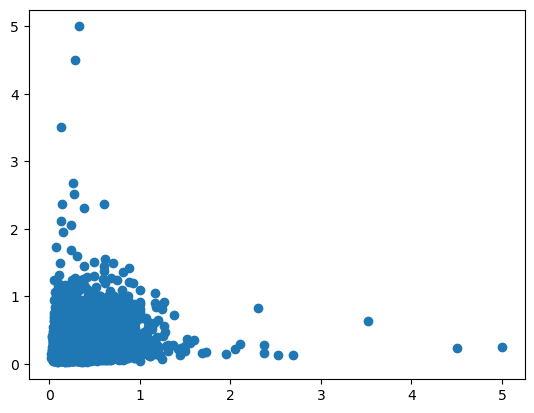

In [51]:
df_small['ratio_t_shifted'] = df_small['ratio'].shift(1)
plt.scatter(df_small['ratio_t_shifted'], df_small['ratio'])

/var/folders/vh/_1sssm_j4md83mcvz3jt1bhjf18777/T/ipykernel_25494/1016705141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['ratio_ewma_100'] = df_small['ratio_t_shifted'].ewm(span=10, adjust=False).mean()


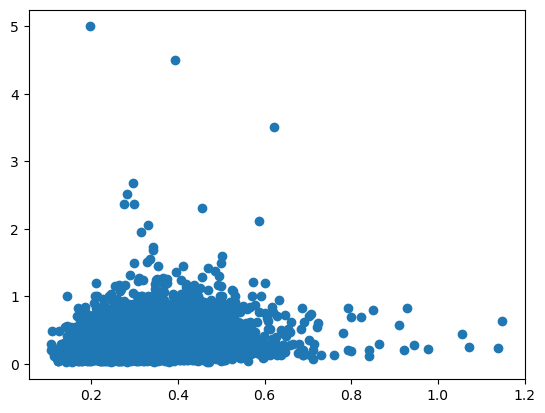

In [60]:
df_small['ratio_ewma_100'] = df_small['ratio_t_shifted'].ewm(span=10, adjust=False).mean()
plt.scatter(df_small['ratio_ewma_100'], df_small['ratio'])

In [68]:
df_small['ratio_volume_weighted'] = (df_small['total_volume_X'] + df_small['total_volume_Y'])*df_small['ratio']
df_small['total_volume'] = df_small['total_volume_X'] + df_small['total_volume_Y']

/var/folders/vh/_1sssm_j4md83mcvz3jt1bhjf18777/T/ipykernel_25494/604456566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['ratio_volume_weighted'] = (df_small['total_volume_X'] + df_small['total_volume_Y'])*df_small['ratio']
/var/folders/vh/_1sssm_j4md83mcvz3jt1bhjf18777/T/ipykernel_25494/604456566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['total_volume'] = df_small['total_volume_X'] + df_small['total_volume_Y']


/var/folders/vh/_1sssm_j4md83mcvz3jt1bhjf18777/T/ipykernel_25494/2665817177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['ratio_volume_weighted_t_shifted'] = df_small['ratio_volume_weighted'].shift(1)
/var/folders/vh/_1sssm_j4md83mcvz3jt1bhjf18777/T/ipykernel_25494/2665817177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['ratio_volume_weighted_ewma_100'] = df_small['ratio_volume_weighted_t_shifted'].ewm(span=100, adjust=False).mean()/df_small['total_volume'].shift(1).rolling(w

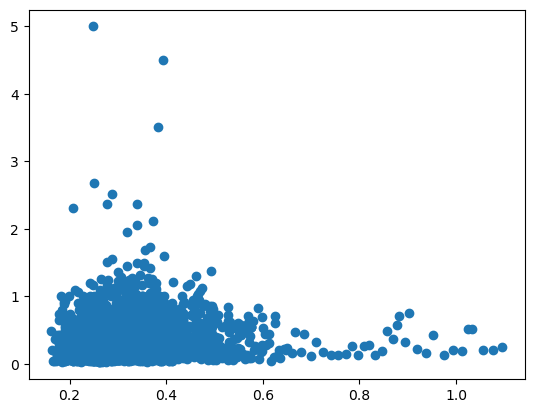

In [92]:
df_small['ratio_volume_weighted_t_shifted'] = df_small['ratio_volume_weighted'].shift(1)
df_small['ratio_volume_weighted_ewma_100'] = df_small['ratio_volume_weighted_t_shifted'].ewm(span=100, adjust=False).mean()/df_small['total_volume'].shift(1).rolling(window=100).mean()
plt.scatter(df_small['ratio_volume_weighted_ewma_100'], df_small['ratio'])

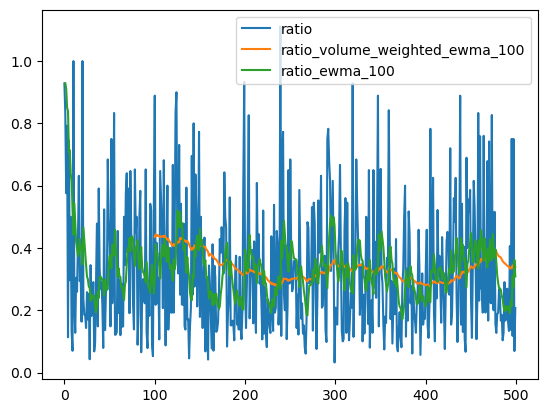

In [93]:
plt.plot(df_small['ratio'].iloc[:500], label='ratio')
plt.plot(df_small['ratio_volume_weighted_ewma_100'].iloc[:500], label='ratio_volume_weighted_ewma_100')
plt.plot(df_small['ratio_ewma_100'].iloc[:500], label='ratio_ewma_100')
plt.legend()

{10: 0.050437861282862075, 20: 0.04739194104724083, 30: 0.04586356788729448, 50: 0.04463295257979608, 100: 0.044459018808600585, 200: 0.0449764290612576, 300: 0.045406620760275775}


/var/folders/vh/_1sssm_j4md83mcvz3jt1bhjf18777/T/ipykernel_25494/2730846122.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['ratio_volume_weighted_ewma'] = df_small['ratio_volume_weighted_t_shifted'].ewm(span=window, adjust=False).mean()/df_small['total_volume'].shift(1).rolling(window=window).mean()
/var/folders/vh/_1sssm_j4md83mcvz3jt1bhjf18777/T/ipykernel_25494/2730846122.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['ratio_ewma'] = df_small['ratio'].shift(1).ewm(span=window

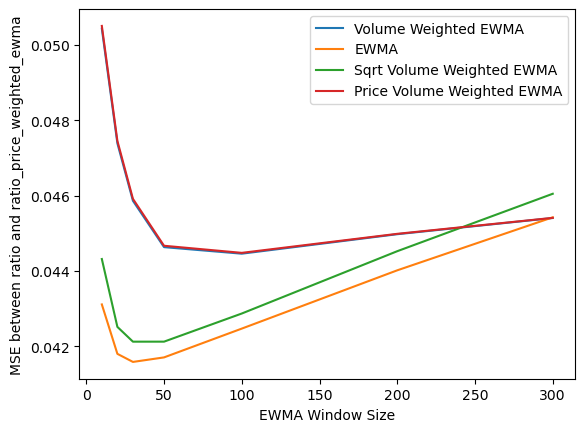

In [153]:
def zero_mean_test(series, adjustment = 0):
    n = len(series)
    mean = series.mean()
    std_err = series.std(ddof=adjustment) / np.sqrt(n - adjustment)
    t_stat = mean / std_err
    from scipy import stats
    p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=n-1))
    return t_stat, p_value

def test_different_volume_weighted_ewma(windows = [10, 20, 30, 50, 100, 200, 300]):
    results = {}
    for window in windows:
        df_small['ratio_volume_weighted_ewma'] = df_small['ratio_volume_weighted_t_shifted'].ewm(span=window, adjust=False).mean()/df_small['total_volume'].shift(1).rolling(window=window).mean()
        mse = ((df_small['ratio'] - df_small['ratio_volume_weighted_ewma'])**2).mean()
        results[window] = mse
    return results

def test_different_ewma(windows = [10, 20, 30, 50, 100, 200, 300]):
    results = {}
    for window in windows:
        df_small['ratio_ewma'] = df_small['ratio'].shift(1).ewm(span=window, adjust=False).mean()
        mse = ((df_small['ratio'] - df_small['ratio_ewma'])**2).mean()
        results[window] = mse
    return results

def test_different_sqrt_volume_weighted_ewma(windows=[10,20,30,50,100,200,300]):
    results = {}
    # compute sqrt weights once
    df_small['sqrt_total_volume'] = df_small['total_volume']**0.4   # fix: 0.5 not 0
    # weighted value (don't shift yet)
    df_small['ratio_sqrt_volume_weighted'] = df_small['sqrt_total_volume'] * df_small['ratio']

    for window in windows:
        # shift first to avoid any forward-looking bias
        num_shifted = df_small['ratio_sqrt_volume_weighted'].shift(1)
        w_shifted   = df_small['sqrt_total_volume'].shift(1)

        # use EWMA for both numerator and denominator so time-weighting matches
        num_ewm = num_shifted.ewm(span=window, adjust=False).mean()
        den_ewm = w_shifted.ewm(span=window, adjust=False).mean()

        df_small['ratio_volume_weighted_ewma'] = num_ewm / den_ewm

        mse = ((df_small['ratio'] - df_small['ratio_volume_weighted_ewma'])**2).mean()
        results[window] = mse

    return results

def test_different_total_volume_price_weighted_ewma(windows = [10, 20, 30, 50, 100, 200, 300]):
    results = {}
    for window in windows:
        df_small['X_mid'] = (df_small['X_BID'] + df_small['X_ASK']) / 2
        df_small['Y_mid'] = (df_small['Y_BID'] + df_small['Y_ASK']) / 2
        df_small['total_volume_price'] = (df_small['total_volume_X'] * df_small['X_mid']) + (df_small['total_volume_Y'] * df_small['Y_mid'])
        df_small['ratio_price_weighted'] = df_small['total_volume_price'] * df_small['ratio']
        df_small['ratio_price_weighted_t_shifted'] = df_small['ratio_price_weighted'].shift(1)
        df_small['ratio_price_weighted_ewma'] = df_small['ratio_price_weighted_t_shifted'].ewm(span=window, adjust=False).mean()/df_small['total_volume_price'].shift(1).rolling(window=window).mean()
        mse = ((df_small['ratio'] - df_small['ratio_price_weighted_ewma'])**2).mean()   
        results[window] = mse
    return results



results = test_different_volume_weighted_ewma()
plt.plot(list(results.keys()), list(results.values()), label='Volume Weighted EWMA')
plt.xlabel('EWMA Window Size')
plt.ylabel('MSE between ratio and ratio_volume_weighted_ewma')
print(results)
results_ewma = test_different_ewma()
plt.plot(list(results_ewma.keys()), list(results_ewma.values()), label='EWMA')
plt.xlabel('EWMA Window Size')
plt.ylabel('MSE between ratio and ratio_ewma')
plt.legend()
results_sqrt = test_different_sqrt_volume_weighted_ewma()
plt.plot(list(results_sqrt.keys()), list(results_sqrt.values()), label='Sqrt Volume Weighted EWMA')
plt.xlabel('EWMA Window Size')
plt.ylabel('MSE between ratio and ratio_sqrt_volume_weighted_ewma')
plt.legend()
results_price = test_different_total_volume_price_weighted_ewma()
plt.plot(list(results_price.keys()), list(results_price.values()), label='Price Volume Weighted EWMA')
plt.xlabel('EWMA Window Size')
plt.ylabel('MSE between ratio and ratio_price_weighted_ewma')
plt.legend()

In [154]:
def test_different_sqrt_volume_weighted_ewma(windows=[10,20,30,50,100,200,300]):
    results = {}
    # compute sqrt weights once
    df_small['sqrt_total_volume'] = df_small['total_volume']**0.5   # fix: 0.5 not 0
    # weighted value (don't shift yet)
    df_small['ratio_sqrt_volume_weighted'] = df_small['sqrt_total_volume'] * df_small['ratio']

    for window in windows:
        # shift first to avoid any forward-looking bias
        num_shifted = df_small['ratio_sqrt_volume_weighted'].shift(1)
        w_shifted   = df_small['sqrt_total_volume'].shift(1)

        # use EWMA for both numerator and denominator so time-weighting matches
        num_ewm = num_shifted.ewm(span=window, adjust=False).mean()
        den_ewm = w_shifted.ewm(span=window, adjust=False).mean()

        df_small['ratio_volume_weighted_ewma'] = num_ewm / den_ewm

        mse = ((df_small['ratio'] - df_small['ratio_volume_weighted_ewma'])**2).mean()
        results[window] = mse

    return results

/var/folders/vh/_1sssm_j4md83mcvz3jt1bhjf18777/T/ipykernel_25494/3034605635.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['ratio_ewma'] = df_small['ratio'].shift(1).ewm(span=window, adjust=False).mean()


Text(0, 0.5, 'MSE between ratio and ratio_ewma')

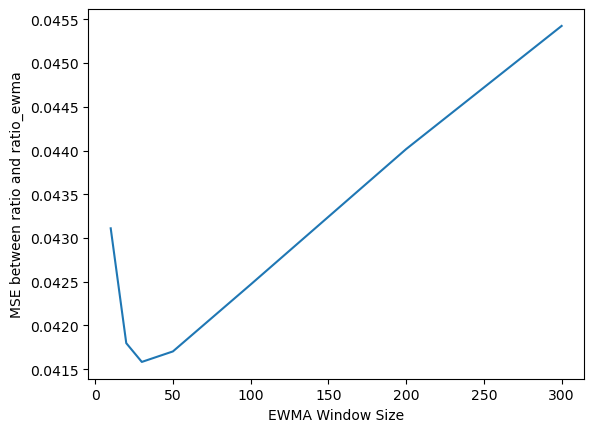

In [122]:
results_ewma = test_different_ewma()
plt.plot(list(results_ewma.keys()), list(results_ewma.values()))
plt.xlabel('EWMA Window Size')
plt.ylabel('MSE between ratio and ratio_ewma')

0.05276622035432909
0.05192195594727809


/var/folders/vh/_1sssm_j4md83mcvz3jt1bhjf18777/T/ipykernel_25494/2341894264.py:254: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['ratio_ewma'] = df_small['ratio_t_shifted'].ewm(span=50, adjust=False).mean()


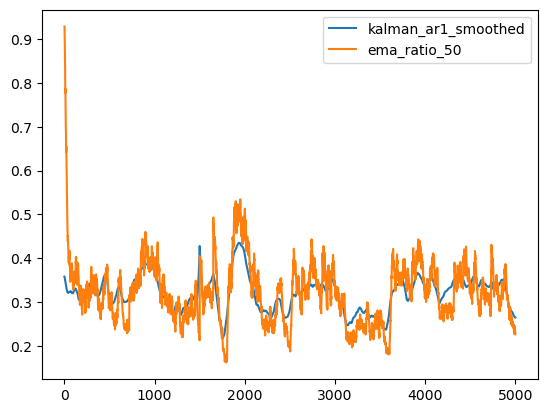

In [412]:
def kalman_filter_scalar(a, b, Q, R, beta0=0.0, P0=1.0, smooth=False):
    """
    Kalman filter for scalar latent state beta_t with observation a_t = beta_t * b_t + eta_t.
    - a, b: 1D arrays or sequences of same length (observations). Can contain np.nan for missing data.
    - Q: process noise variance (eps variance)
    - R: measurement noise variance (eta variance)
    - beta0: initial state mean
    - P0: initial state variance
    - smooth: if True, run RTS smoother after filtering

    Returns dict with keys:
      'beta_filtered' : filtered state means (length T)
      'P_filtered'    : filtered state variances (length T)
      'beta_pred'     : one-step predicted state means (length T)
      'P_pred'        : one-step predicted state variances (length T)
      'K'             : Kalman gains (length T)
      'residuals'     : measurement residuals (a_t - b_t * beta_pred), np.nan if missing
      'beta_smoothed' : smoothed means (only if smooth=True)
      'P_smoothed'    : smoothed variances (only if smooth=True)
    """
    a = np.asarray(a, dtype=float)
    b = np.asarray(b, dtype=float)
    if a.shape != b.shape:
        raise ValueError("a and b must have the same shape")

    T = len(a)
    beta_f = np.empty(T)
    P_f = np.empty(T)
    beta_pr = np.empty(T)
    P_pr = np.empty(T)
    K = np.empty(T)
    residuals = np.empty(T)

    prev_beta = float(beta0)
    prev_P = float(P0)

    for t in range(T):
        # Predict
        pred_beta = prev_beta                    # state transition is identity
        pred_P = prev_P + Q

        beta_pr[t] = pred_beta
        P_pr[t] = pred_P

        # If measurement missing or b is nan -> skip update
        if np.isnan(a[t]) or np.isnan(b[t]):
            K[t] = 0.0
            residuals[t] = np.nan
            up_beta = pred_beta
            up_P = pred_P
        else:
            H = float(b[t])    # observation scalar
            # Innovation covariance S = H * P_pr * H + R
            S = (H * pred_P * H) + R
            # avoid divide-by-zero
            if S == 0.0:
                Kt = 0.0
            else:
                Kt = (pred_P * H) / S   # Kalman gain (scalar)
            resid = a[t] - H * pred_beta

            # Update with Joseph form for numerical stability (scalar simplifies)
            up_beta = pred_beta + Kt * resid
            up_P = (1.0 - Kt * H) * pred_P  # safe for scalar; Joseph form would be (1-KH)P(1-KH)+K R K

            K[t] = Kt
            residuals[t] = resid

        beta_f[t] = up_beta
        P_f[t] = up_P

        # prepare for next step
        prev_beta = up_beta
        prev_P = up_P

    result = {
        'beta_filtered': beta_f,
        'P_filtered': P_f,
        'beta_pred': beta_pr,
        'P_pred': P_pr,
        'K': K,
        'residuals': residuals,
    }

    if smooth:
        # RTS smoother (backward pass)
        beta_s = np.empty(T)
        P_s = np.empty(T)
        beta_s[-1] = beta_f[-1]
        P_s[-1] = P_f[-1]
        for t in range(T - 2, -1, -1):
            # smoother gain: C = P_f[t] * A' * inv(P_pred[t+1]); A = 1
            P_pred_next = P_pr[t + 1]
            if P_pred_next <= 0:
                C = 0.0
            else:
                C = P_f[t] / P_pred_next
            beta_s[t] = beta_f[t] + C * (beta_s[t + 1] - beta_pr[t + 1])
            P_s[t] = P_f[t] + C * (P_s[t + 1] - P_pred_next) * C
        result['beta_smoothed'] = beta_s
        result['P_smoothed'] = P_s

    return result
import numpy as np

def kalman_filter_const_velocity(a, b, Q_mat, R, x0=None, P0=None, smooth=False):
    """
    2-state Kalman: x = [beta, v]. F = [[1,1],[0,1]]; H = [b_t, 0].
    - Q_mat: 2x2 process covariance (for eps1, eps2)
    - R: measurement variance
    - x0: initial 2-vector
    - P0: initial 2x2 covariance
    """
    a = np.asarray(a, dtype=float)
    b = np.asarray(b, dtype=float)
    T = len(a)
    if a.shape != b.shape:
        raise ValueError("a and b must match")
    F = np.array([[1.0, 1.0],[0.0, 1.0]])
    if x0 is None:
        x0 = np.array([0.0, 0.0], dtype=float)
    if P0 is None:
        P0 = np.eye(2)
    Q = np.asarray(Q_mat, dtype=float)

    x_f = np.zeros((T,2))
    P_f = np.zeros((T,2,2))
    x_pr = np.zeros((T,2))
    P_pr = np.zeros((T,2,2))
    K_store = np.zeros((T,2))
    residuals = np.zeros(T)

    prev_x = x0.copy(); prev_P = P0.copy()

    for t in range(T):
        # predict
        pred_x = F @ prev_x
        pred_P = F @ prev_P @ F.T + Q
        x_pr[t], P_pr[t] = pred_x, pred_P

        if np.isnan(a[t]) or np.isnan(b[t]):
            x_up, P_up = pred_x, pred_P
            K_store[t] = np.array([0.0,0.0])
            residuals[t] = np.nan
        else:
            H = np.array([b[t], 0.0]).reshape(1,2)   # 1x2
            S = (H @ pred_P @ H.T).item() + R        # scalar
            if S == 0.0:
                K = np.zeros(2)
            else:
                K = (pred_P @ H.T).ravel() / S      # 2-vector
            resid = a[t] - (H @ pred_x).item()

            x_up = pred_x + K * resid
            # Joseph form for covariance update
            I = np.eye(2)
            KH = (K.reshape(2,1) @ H)               # 2x2
            P_up = (I - KH) @ pred_P @ (I - KH).T + (K.reshape(2,1) * R) @ (K.reshape(1,2))

            K_store[t] = K
            residuals[t] = resid

        x_f[t], P_f[t] = x_up, P_up
        prev_x, prev_P = x_up, P_up

    result = {'x_filtered': x_f, 'P_filtered': P_f, 'x_pred': x_pr, 'P_pred': P_pr,
              'K': K_store, 'residuals': residuals}

    if smooth:
        # RTS smoother
        x_s = np.zeros_like(x_f)
        P_s = np.zeros_like(P_f)
        x_s[-1], P_s[-1] = x_f[-1], P_f[-1]
        for t in range(T-2, -1, -1):
            P_pred_next = P_pr[t+1]
            # compute smoother gain: C = P_f[t] * F.T * inv(P_pr[t+1])
            invPpred = np.linalg.pinv(P_pred_next)
            C = P_f[t] @ F.T @ invPpred
            x_s[t] = x_f[t] + C @ (x_s[t+1] - x_pr[t+1])
            P_s[t] = P_f[t] + C @ (P_s[t+1] - P_pred_next) @ C.T
        result['x_smoothed'] = x_s
        result['P_smoothed'] = P_s

    return result


from sklearn.metrics import mean_squared_error


def kalman_filter_scalar_ar1(a, b, Q, R, phi=1, beta0=0.0, P0=1.0, smooth=False):
    a = np.asarray(a, dtype=float)
    b = np.asarray(b, dtype=float)
    if a.shape != b.shape:
        raise ValueError("a and b must have same shape")
    T = len(a)
    beta_f = np.empty(T)
    P_f = np.empty(T)
    beta_pr = np.empty(T)
    P_pr = np.empty(T)
    K = np.empty(T)
    residuals = np.empty(T)

    prev_beta = float(beta0)
    prev_P = float(P0)

    for t in range(T):
        # Predict (AR(1) transition)
        pred_beta = phi * prev_beta
        pred_P = phi*phi * prev_P + Q

        beta_pr[t], P_pr[t] = pred_beta, pred_P

        if np.isnan(a[t]) or np.isnan(b[t]):
            K[t] = 0.0
            residuals[t] = np.nan
            up_beta, up_P = pred_beta, pred_P
        else:
            H = float(b[t])
            S = H * pred_P * H + R
            Kt = 0.0 if S == 0.0 else (pred_P * H) / S
            resid = a[t] - H * pred_beta
            up_beta = pred_beta + Kt * resid
            up_P = (1.0 - Kt * H) * pred_P

            K[t], residuals[t] = Kt, resid

        beta_f[t], P_f[t] = up_beta, up_P
        prev_beta, prev_P = up_beta, up_P

    result = {'beta_filtered': beta_f, 'P_filtered': P_f, 'beta_pred': beta_pr,
              'P_pred': P_pr, 'K': K, 'residuals': residuals}

    if smooth:
        # RTS smoother for scalar AR(1) (similar form, F=phi)
        beta_s = np.empty(T); P_s = np.empty(T)
        beta_s[-1], P_s[-1] = beta_f[-1], P_f[-1]
        for t in range(T-2, -1, -1):
            P_pred_next = P_pr[t+1]
            C = 0.0 if P_pred_next <= 0 else (P_f[t] * phi) / P_pred_next
            beta_s[t] = beta_f[t] + C * (beta_s[t+1] - beta_pr[t+1])
            P_s[t] = P_f[t] + C * (P_s[t+1] - P_pred_next) * C
        result['beta_smoothed'], result['P_smoothed'] = beta_s, P_s

    return result
result_kalman = kalman_filter_scalar_ar1(
    a = df_small['total_volume_X'],
    b = df_small['total_volume_Y'],
    Q = 0.0007,
    R = 1000,
    beta0 = df_small['ratio'].iloc[0],
    P0 = 10,
    smooth = True
)
df_small['ratio_ewma'] = df_small['ratio_t_shifted'].ewm(span=50, adjust=False).mean()
    
#plt.plot(df_small['ratio'].iloc[:5000], label='ratio')
bias = 0.073
plt.plot(result_kalman['beta_smoothed'][:5000] + bias, label='kalman_ar1_smoothed')
plt.plot(df_small['ratio_ewma'].iloc[:5000], label='ema_ratio_50')
plt.legend()
print(mean_squared_error(df_small['ratio'][60:5000].clip(0,5), result_kalman['beta_pred'][60:5000]+bias))
print(mean_squared_error(df_small['ratio'][60:5000].clip(0,5), df_small['ratio_ewma'][60:5000]))



In [229]:
result_kalman = kalman_filter_scalar(
    a = df_small['total_volume_X'],
    b = df_small['total_volume_Y'],
    Q = 10000,
    R = 10000,
    beta0 = df_small['ratio'].iloc[0],
    P0 = 10,
    smooth = True
)

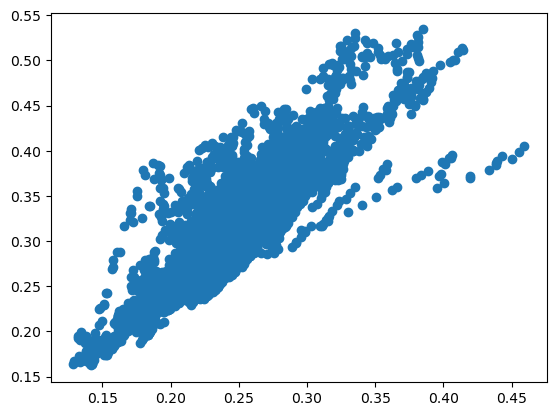

In [ ]:
plt.scatter(result_kalman['beta_pred'][60:5000],df_small['ratio_ewma'][60:5000])


array([[1.        , 0.17264016],
       [0.17264016, 1.        ]])

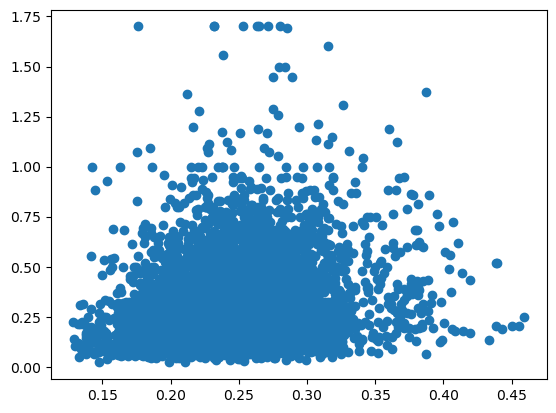

In [424]:
plt.scatter(result_kalman['beta_pred'][60:5000],df_small['ratio'][60:5000].clip(0,1.7))
np.corrcoef(result_kalman['beta_pred'][60:5000],df_small['ratio'][60:5000].clip(0,1.7))

array([[1.        , 0.22894614],
       [0.22894614, 1.        ]])

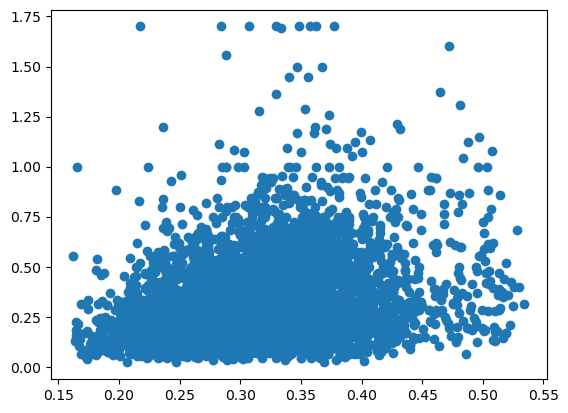

In [425]:
plt.scatter(df_small['ratio_ewma'][60:5000],df_small['ratio'][60:5000].clip(0,1.7))
np.corrcoef(df_small['ratio_ewma'][60:5000],df_small['ratio'][60:5000].clip(0,1.7))

array([[1.        , 0.85628984],
       [0.85628984, 1.        ]])

Text(0, 0.5, 'MSE between ratio and kalman smoothed estimate')

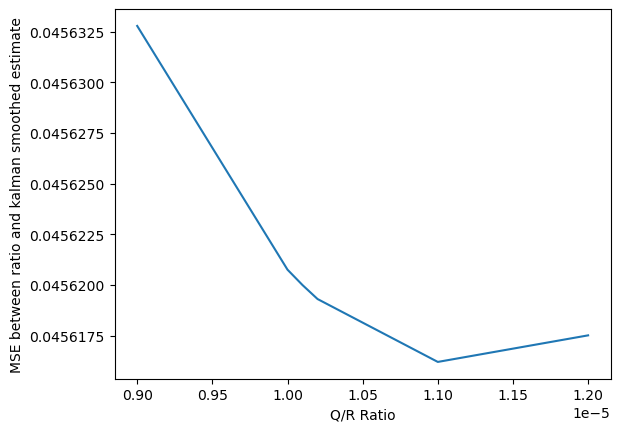

In [286]:
def test_kelman_filter(Q, R):
    from sklearn.metrics import mean_squared_error

    result_kalman = kalman_filter_scalar(
        a = df_small['total_volume_X'],
        b = df_small['total_volume_Y'],
        Q = Q,
        R = R,
        beta0 = df_small['ratio'].iloc[0],
        P0 = 0.001,
        smooth = True
    )

    beta_smoothed = result_kalman['beta_pred']
    mse = mean_squared_error(df_small['ratio'], beta_smoothed)
    return mse  

# perform grid search over the ratios Q/R
QR_ratios = [9e-6, 1e-5,1.01e-5, 1.02e-5, 1.1e-5, 1.2e-5]
results_kalman = {}
for ratio in QR_ratios:
    Q = ratio * 1000
    R = 1000
    mse = test_kelman_filter(Q, R)
    results_kalman[ratio] = mse 
plt.plot(list(results_kalman.keys()), list(results_kalman.values()))

plt.xlabel('Q/R Ratio')
plt.ylabel('MSE between ratio and kalman smoothed estimate')    
